In [1]:
#install.packages("ggpubr")

In [2]:
library(ggplot2)
library(plyr)
library(ggpubr)


Attaching package: 'ggpubr'


The following object is masked from 'package:plyr':

    mutate




In [3]:
options(repr.plot.width=6, repr.plot.height=3.5)

In [4]:
auto_mobile <- read.csv("datasets/auto_mobiles_processed.csv", header=TRUE)

head(auto_mobile, 10)

,normalized_losses,fuel_type,aspiration,number_of_doors,drive_wheels,engine_location,wheel_base,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,168,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,168,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,168,gas,std,two,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,164,gas,std,four,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,164,gas,std,four,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,161,gas,std,two,fwd,front,99.8,177.3,66.3,53.1,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,158,gas,std,four,fwd,front,105.8,192.7,71.4,55.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,168,gas,std,four,fwd,front,105.8,192.7,71.4,55.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,158,gas,turbo,four,fwd,front,105.8,192.7,71.4,55.9,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875


In [5]:
dim(auto_mobile)

[1] 187  23

In [6]:
set.seed=(1000)

price_subset <- sample(auto_mobile$price, 29)

price_subset

[1] 14489  7299 10245  6692 17199 10295 22018  8013 13950 16503  6669 16845
[13]  7775 15690  5389 16500 11199  6575  7957  5499 16695  5151 16430 15040
[25]  6095  6795  7099 20970  6938

In [7]:
shapiro.test(price_subset)


	Shapiro-Wilk normality test

data:  price_subset
W = 0.88189, p-value = 0.003708


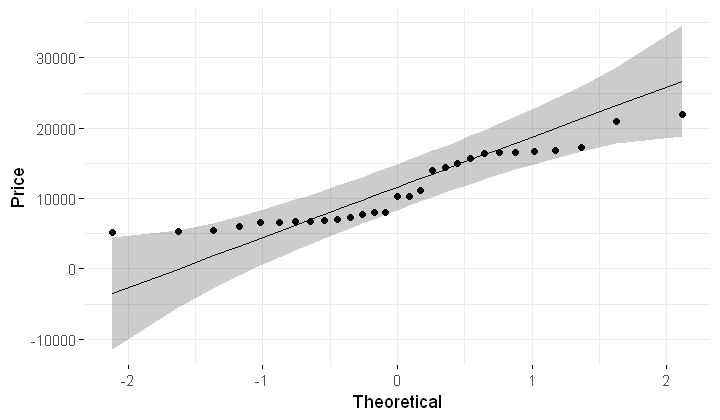

In [8]:
ggqqplot(price_subset, ylab="Price", ggtheme = theme_minimal())

In [9]:
actual_mean <- mean(price_subset)

actual_mean

[1] 11310.83

In [10]:
std <- sd(price_subset)

std

[1] 5147.568

In [11]:
len_data <- length(price_subset)

len_data

[1] 29

In [12]:
std_error <- std /sqrt(price_subset)

std_error

[1] 42.76445 60.25186 50.85646 62.92513 39.25098 50.73281 34.69071 57.50486
 [9] 43.58279 40.07012 63.03355 39.66127 58.37836 41.09516 70.12099 40.07376
[17] 48.64212 63.48253 57.70686 69.41611 39.83904 71.72265 40.15904 41.97379
[25] 65.93489 62.44640 61.09470 35.54700 61.79950

In [13]:
mu = 1000

In [14]:
t_stat <- (actual_mean - mu) / (std / sqrt(len_data))

t_stat

[1] 10.78674

In [15]:
p_value <- 2 * pt(t_stat, df = len_data - 1, lower=F)

p_value

[1] 1.762388e-11

In [16]:
if (p_value <= 0.05) {
    'Mean of sample not equal to 1000 (alt hypothesis)'
} else {
    'Mean of sample is equal to 1000 (null hypothesis)'
}

[1] "Mean of sample not equal to 1000 (alt hypothesis)"

In [17]:
summary(price_subset)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5151    6795   10245   11311   16430   22018 

In [18]:
t_test <- t.test(price_subset, mu=mu, alternative = "two.sided")

t_test


	One Sample t-test

data:  price_subset
t = 10.787, df = 28, p-value = 1.762e-11
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  9352.797 13268.858
sample estimates:
mean of x 
 11310.83 


In [19]:
names(t_test)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

In [20]:
t_test$statistic

t 
10.78674

In [21]:
t_test$p.value

[1] 1.762388e-11

***

In [22]:
#install.packages(c("pastecs", "TeachingDemos"))

In [23]:
library(TeachingDemos)
library(pastecs)

In [24]:
nrow(auto_mobile)

[1] 187

In [25]:
shapiro.test(auto_mobile$price)


	Shapiro-Wilk normality test

data:  auto_mobile$price
W = 0.90311, p-value = 1.045e-09


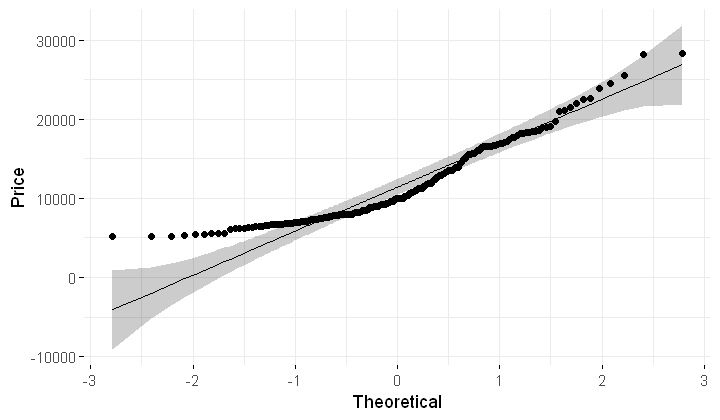

In [27]:
ggqqplot(auto_mobile$price, ylab="Price", ggtheme = theme_minimal())

In [28]:
z_actual_mean <- mean(auto_mobile$price)

z_actual_mean

[1] 11503.18

In [31]:
z_std <- sd(auto_mobile$price)

z_std

[1] 4979.407

In [32]:
z_len_data <- length(auto_mobile$price)

z_len_data

[1] 187

In [34]:
z_std_error <- z_std / sqrt(z_len_data)

z_std_error

[1] 364.1303

In [35]:
mu

[1] 1000

In [36]:
z_stat <- (z_actual_mean - mu) / (z_std / sqrt(z_len_data))

z_stat

[1] 28.84456

In [37]:
p_value <- 2 * pnorm(-abs(z_stat))

p_value

[1] 5.929346e-183

In [38]:
if (p_value <= 0.5) {
    "Mean of sample not equal to 10000 (alt hypothesis)"
} else {"Mean of sample is equal to 1000 (null hypothesis)"
}

[1] "Mean of sample not equal to 10000 (alt hypothesis)"

In [39]:
z_test <- z.test(auto_mobile$price, mu=mu, stdev = z_std)

z_test


	One Sample z-test

data:  auto_mobile$price
z = 28.845, n = 187.00, Std. Dev. = 4979.41, Std. Dev. of the sample
mean = 364.13, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
 10789.49 12216.86
sample estimates:
mean of auto_mobile$price 
                 11503.18 
